<a href="https://colab.research.google.com/github/0Sensei2/Data-Mining/blob/main/Prediksi_Regresi_dan_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install xgboost scikit-learn

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Regressor models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Ganti path di bawah dengan path ke file kamu
file_path = '/content/drive/MyDrive/Prediksi/tes.csv'

df = pd.read_csv(file_path)
print(df.head())  # opsional, tampilkan 5 data pertama

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         1         0         0         1         1         0   
1   2         1         0         0         0         0         0         0   
2   3         1         1         1         0         1         1         0   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         1         0         0         0   

   A8_Score  A9_Score  ...        age  gender       ethnicity jaundice austim  \
0         0         1  ...  15.599481       m  White-European      yes     no   
1         1         0  ...  27.181099       m           Asian       no     no   
2         1         1  ...  31.643906       m  White-European      yes     no   
3         0         0  ...  25.369210       m               ?       no     no   
4         0         0  ...   9.078580       m               ?       no     no   

  contry_of_res used_app_before     re

In [6]:
df_reg = df.drop(columns=["ID", "age_desc", "relation"])  # kita prediksi kolom 'result'

# 3. Encode data kategorikal
label_encoders = {}
for column in df_reg.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_reg[column] = le.fit_transform(df_reg[column])
    label_encoders[column] = le

# 4. Pisahkan fitur dan target
X = df_reg.drop("result", axis=1)
y = df_reg["result"]

# 5. Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=42)

# 6. Inisialisasi semua model
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0),
}


In [7]:
# Evaluasi tiap model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

    print(f"===== {name} =====")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R-squared: {r2:.4f} ({r2 * 100:.2f}%)\n")


===== Random Forest =====
MAE: 0.3755
MSE: 0.9694
RMSE: 0.9846
R-squared: 0.9459 (94.59%)

===== XGBoost =====
MAE: 0.5566
MSE: 0.9353
RMSE: 0.9671
R-squared: 0.9478 (94.78%)



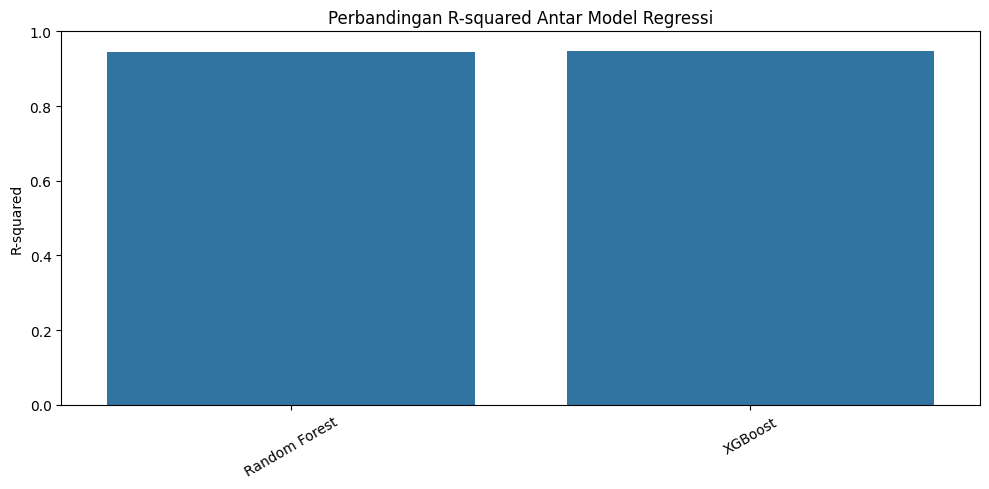

In [8]:
# 8. Visualisasi R-squared semua model
model_names = list(results.keys())
r2_scores = [results[m]["R2"] for m in model_names]

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=r2_scores)
plt.title("Perbandingan R-squared Antar Model Regressi")
plt.ylabel("R-squared")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

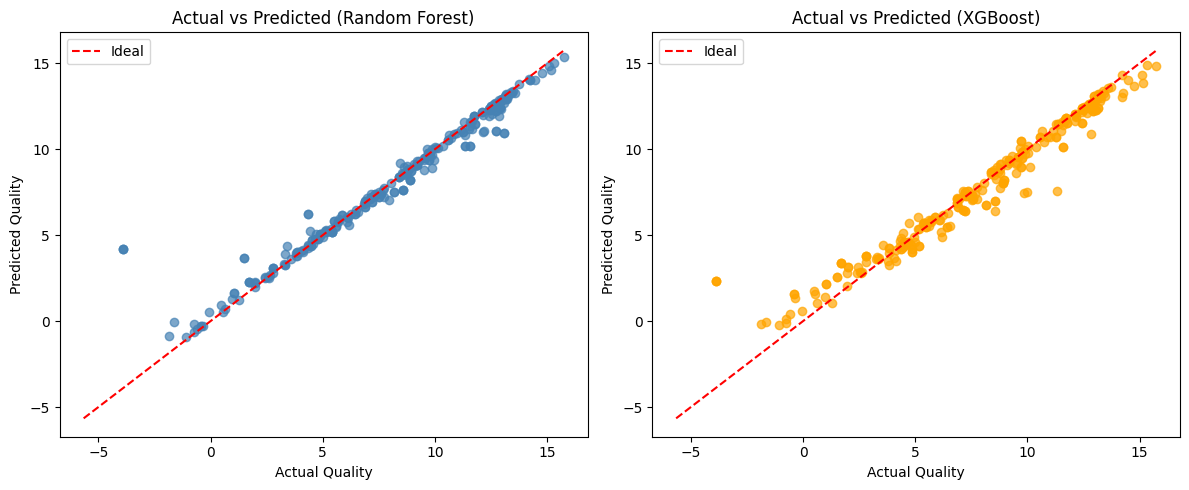

In [12]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# ===== 4. Scatter Plot =====
plt.figure(figsize=(12, 5))

# Plot untuk Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_pred, color='steelblue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted (Random Forest)')
plt.legend()

# Plot untuk XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_pred, color='orange', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted (XGBoost)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

# 1. Persiapkan dataset
df_reg = df.copy()
df_reg = df_reg.drop(columns=["ID", "age_desc", "relation"])

# 2. Encode semua kolom kategorikal
for col in df_reg.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_reg[col] = le.fit_transform(df_reg[col])

# 3. Fitur dan target
X = df_reg.drop("result", axis=1)
y = df_reg["result"]

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.17, random_state=42
)

# 5. Train model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# 6. Train model XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# 7. Ambil 10 data acak
random_indices = np.random.choice(len(X_test), size=10, replace=False)

# 8. Buat DataFrame perbandingan
compare_df = pd.DataFrame({
    'Actual': y_test.values[random_indices],
    'RandomForest_Predicted': rf_pred[random_indices],
    'XGBoost_Predicted': xgb_pred[random_indices]
})

# 9. Tambahkan kolom 'Keterangan' untuk masing-masing model
compare_df["RF_Keterangan"] = np.where(
    abs(compare_df["Actual"] - compare_df["RandomForest_Predicted"]) <= 0.5, "Benar", "Salah"
)

compare_df["XGB_Keterangan"] = np.where(
    abs(compare_df["Actual"] - compare_df["XGBoost_Predicted"]) <= 0.5, "Benar", "Salah"
)

# 10. Tampilkan hasil
print(compare_df.round(2))


   Actual  RandomForest_Predicted  XGBoost_Predicted RF_Keterangan  \
0    4.50                    4.76               4.68         Benar   
1   12.44                   12.41              12.22         Benar   
2   12.87                   12.87              12.15         Benar   
3    4.88                    4.92               4.61         Benar   
4   11.57                   11.25              11.51         Benar   
5    5.41                    5.15               5.18         Benar   
6    6.18                    5.57               4.17         Salah   
7    0.97                    1.29               1.27         Benar   
8   12.52                   12.52              12.31         Benar   
9    5.72                    5.96               5.90         Benar   

  XGB_Keterangan  
0          Benar  
1          Benar  
2          Salah  
3          Benar  
4          Benar  
5          Benar  
6          Salah  
7          Benar  
8          Benar  
9          Benar  


In [ ]:
# 1. Tambahkan kolom kelompok umur
def categorize_age(age):
    if age < 13:
        return "Anak"
    elif 13 <= age < 18:
        return "Remaja"
    else:
        return "Dewasa"

df['age_group'] = df['age'].apply(categorize_age)

# 2. Drop kolom tidak relevan untuk klasifikasi
df_model = df.drop(columns=["ID", "age_desc", "relation", "result"])

# 3. Encode semua kolom kategorikal
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df_model.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_model[column] = le.fit_transform(df_model[column])
    label_encoders[column] = le

# 4. Pisahkan fitur dan target
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df_model.drop(columns=["austim"])
y = df_model["austim"]

# 5. Split data train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Latih model klasifikasi
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 7. Evaluasi akurasi
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi Klasifikasi: {acc:.4f} ({acc * 100:.2f}%)")

# 8. Distribusi hasil prediksi berdasarkan kelompok usia
X_test_with_age = X_test.copy()
X_test_with_age['actual'] = y_test
X_test_with_age['predicted'] = y_pred
X_test_with_age['age_group'] = df.loc[X_test.index, 'age_group']

age_group_summary = X_test_with_age.groupby('age_group')[['actual', 'predicted']].apply(lambda x: pd.Series({
    'Total': len(x),
    'Predicted_Positive': (x['predicted'] == 1).sum(),
    'Actual_Positive': (x['actual'] == 1).sum()
}))
age_group_summary


Akurasi Klasifikasi: 1.0000 (100.00%)


,Total,Predicted_Positive,Actual_Positive
age_group,,,
Anak,40,5,5
Dewasa,241,25,25
Remaja,39,7,7


In [ ]:
# Hitung jumlah penderita autisme dan non-autisme untuk setiap kelompok usia
jumlah_per_grup = df.groupby(['age_group', 'austim']).size().reset_index(name='Jumlah')

# Tampilkan hasil
print(jumlah_per_grup)


  age_group austim  Jumlah
0      Anak     no     118
1      Anak    yes      17
2    Dewasa     no    1054
3    Dewasa    yes     150
4    Remaja     no     221
5    Remaja    yes      40


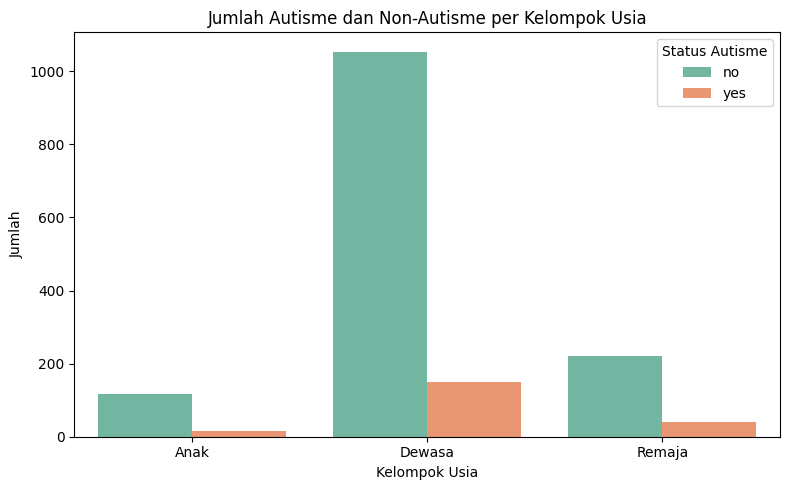

In [ ]:
# Hitung jumlah penderita autisme dan non-autisme per kelompok usia
jumlah_per_grup = df.groupby(['age_group', 'austim']).size().reset_index(name='Jumlah')

# Visualisasi bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='age_group', y='Jumlah', hue='austim', data=jumlah_per_grup, palette='Set2')

plt.title('Jumlah Autisme dan Non-Autisme per Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah')
plt.legend(title='Status Autisme')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Salin dataframe agar tidak merusak data asli
data = df.copy()

# Buat kolom age_group: Anak (0-12), Remaja (13-17), Dewasa (18+)
def categorize_age(age):
    if age <= 12:
        return 'Anak'
    elif age <= 17:
        return 'Remaja'
    else:
        return 'Dewasa'

data = data[data['age'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]  # pastikan numerik
data['age'] = data['age'].astype(float)
data['age_group'] = data['age'].apply(categorize_age)

# Encode fitur kategorikal
le_gender = LabelEncoder()
le_autism = LabelEncoder()
le_age_group = LabelEncoder()

data['gender'] = le_gender.fit_transform(data['gender'])
data['austim'] = le_autism.fit_transform(data['austim'])  # yes = 1, no = 0
data['age_group'] = le_age_group.fit_transform(data['age_group'])

# Pilih fitur dan target
X = data[['gender', 'age_group']]
y = data['austim']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Hitung distribusi autisme berdasarkan kombinasi gender dan age_group
data['age_group_label'] = le_age_group.inverse_transform(data['age_group'])
data['gender_label'] = le_gender.inverse_transform(data['gender'])

group_counts = data.groupby(['age_group_label', 'gender_label'])['austim'].value_counts().unstack().fillna(0)

group_counts


austim                            0     1
age_group_label gender_label             
Anak            f              34.0   0.0
                m              56.0   9.0
Dewasa          f             560.0  69.0
                m             540.0  94.0
Remaja          f              94.0  18.0
                m             109.0  17.0

<Figure size 1000x600 with 0 Axes>

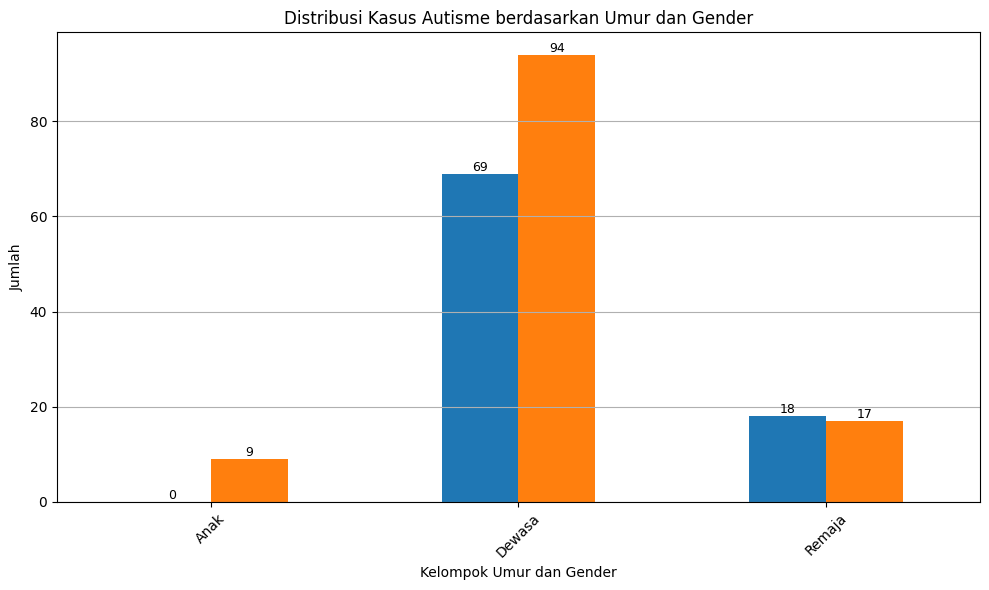

In [ ]:
# Ubah warna bar chart: gunakan warna berbeda untuk tiap kombinasi kelompok
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.figure(figsize=(10, 6))
ax = group_counts_plot[['Autis']].unstack().plot(
    kind='bar',
    color=colors,
    figsize=(10, 6),
    legend=False
)

plt.title('Distribusi Kasus Autisme berdasarkan Umur dan Gender')
plt.ylabel('Jumlah')
plt.xlabel('Kelompok Umur dan Gender')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Tambahkan nilai di atas bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
